In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [229]:
df=pd.read_csv(r'F:\Adult-Income-Prediction\data\adult.csv')

In [230]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [231]:
#MAPPING Gender and income
#df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['income']=df['income'].map({'<=50K':0,'>50K':1})

### Nans are hidden becuase of another value which is '?' which denotes NaN or NA which make data looks clean while it is not

In [232]:
df.replace('?',np.nan,inplace=True)

In [233]:
df['native.country']=df['native.country'].map({'United-States':'USA'}).fillna('Foreigner')

In [234]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [236]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [ ]:
#Searching for weird values to change since their is no NaNs
#for col in df.columns:
    #print(df[f'{col}'].value_counts())
    


age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: count, Length: 21648, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
education.num
9     10501

In [238]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


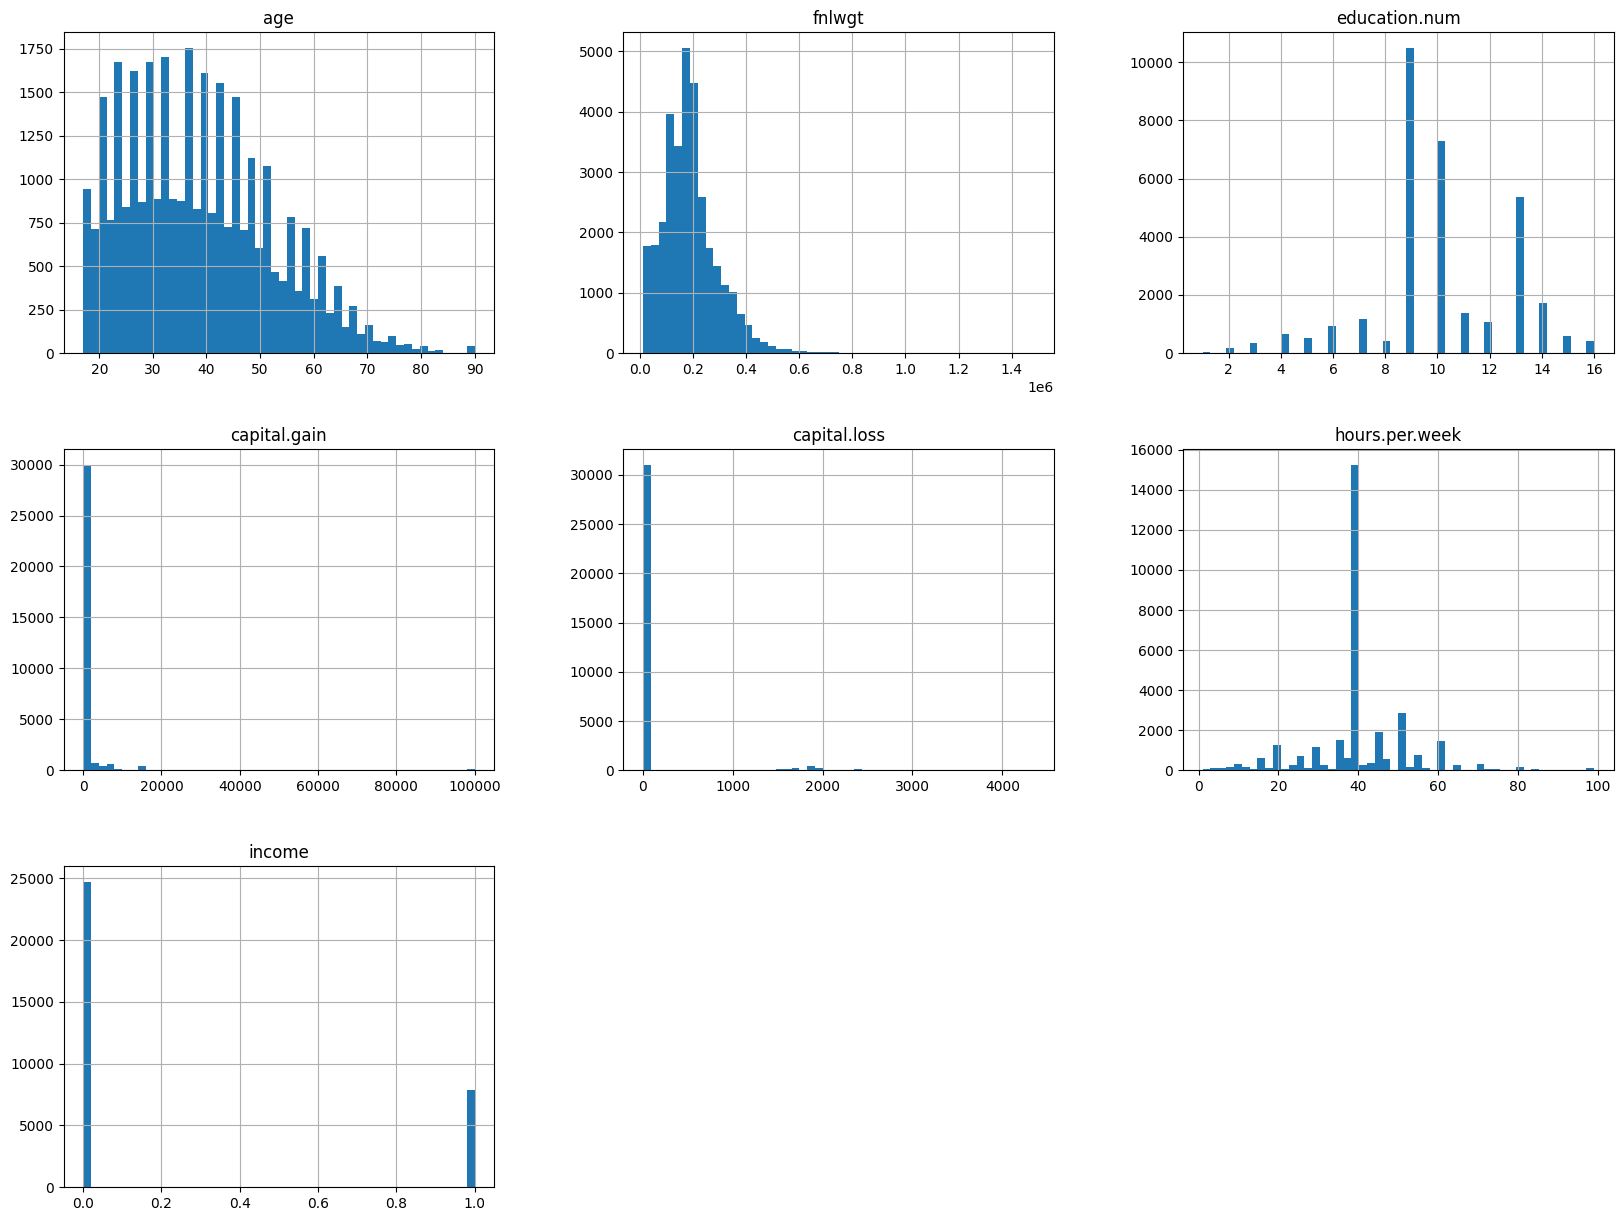

In [239]:
#Univariate plot for numerical Features to look at distrbution
df.hist(bins=50,figsize=(20,15))
plt.show()

In [240]:
#Split data into train and test
train,test=train_test_split(df,test_size=0.2,random_state=42,stratify=df['income'])

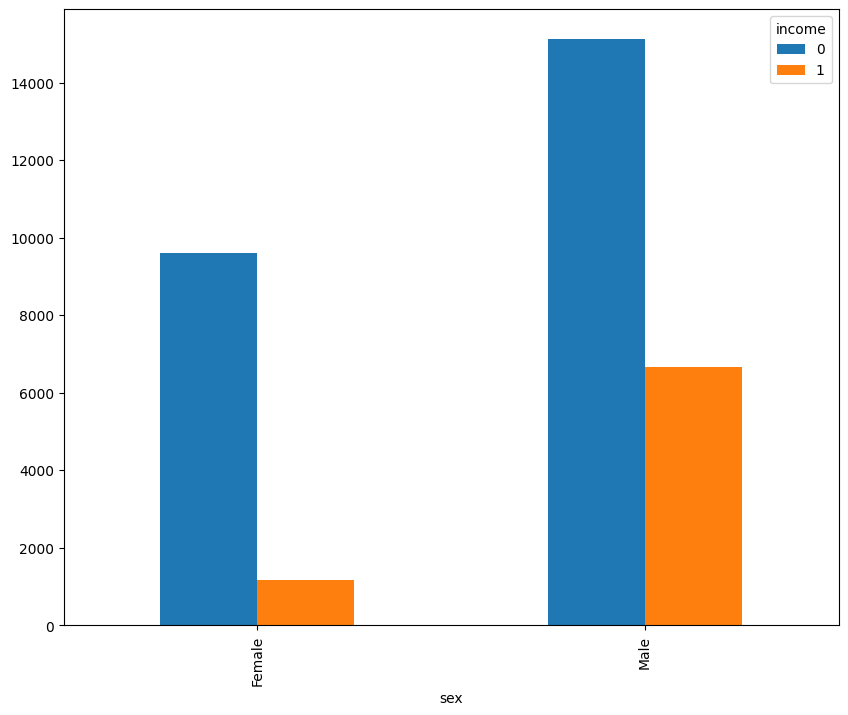

In [241]:
# trying to see if Gender and income are correlated if men or women are getting paid more in general not at the same job just in general
pd.crosstab(df['sex'], df['income']).plot(kind='bar', figsize=(10,8))
plt.show()

C:\Users\omara\AppData\Local\Temp\ipykernel_17644\3390664816.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.groupby('sex', group_keys=False)
C:\Users\omara\AppData\Local\Temp\ipykernel_17644\3390664816.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.groupby('sex', group_keys=False)
C:\Users\omara\AppData\Local\Temp\ipykernel_17644\3390664816.py:7: DeprecationWa

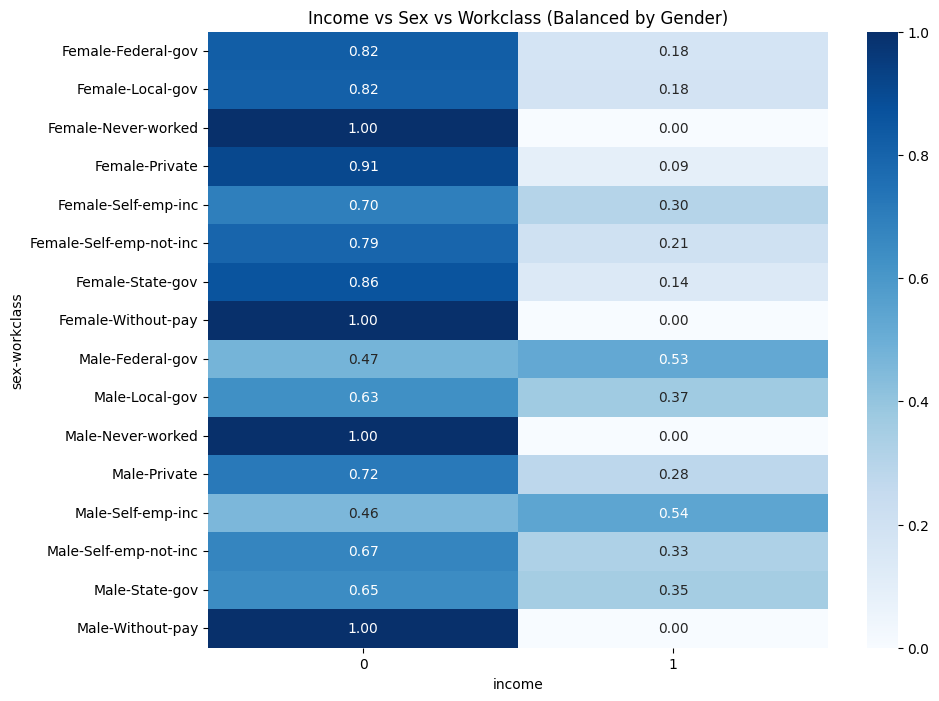

In [242]:
#now for a more accurate plot we need to first make the represantion of both genders equal
#we need to attach a third variable to the plot which represent the work so to see clearly if a man working the same as a woman's job is going to get paid more , less or the same
import seaborn as sns
#Balance sample sizes within each workclass
balanced_df = (
    df.groupby('workclass', group_keys=False)
      .apply(lambda x: x.groupby('sex', group_keys=False)
                       .apply(lambda g: g.sample(n=min(x['sex'].value_counts().min(), len(g)), random_state=42)))
)

#Build the normalized crosstab (rows = sex + workclass, cols = income)
ct = pd.crosstab([balanced_df['sex'], balanced_df['workclass']], balanced_df['income'], normalize='index')

# Step 3️⃣: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f")
plt.title("Income vs Sex vs Workclass (Balanced by Gender)")
plt.show()

In [243]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [244]:
df['native.country'].value_counts()

native.country
USA          29170
Foreigner     3391
Name: count, dtype: int64

<Axes: >

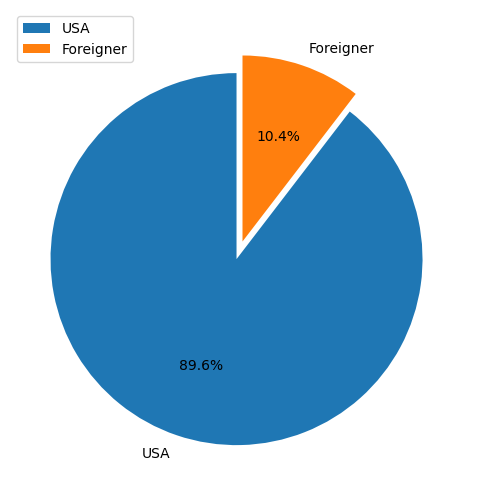

In [245]:
#What is the percentage of foreginers
df['native.country'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,figsize=(6,8),legend=True,explode=[0.1,0],ylabel='')

### data is skewed a bit in favor of people earning under 50K so the probability is a bit skewed that is why we see the upper limit is 50% not a single occupation above it becuase majority earns under 50k

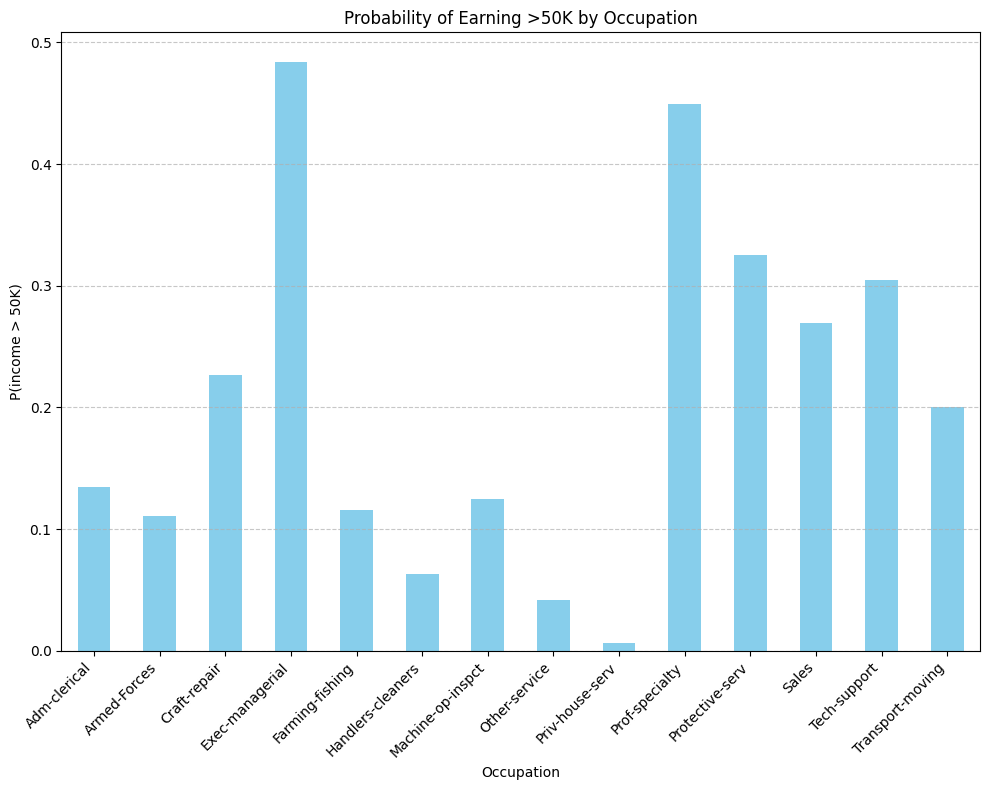

In [253]:
income_by_occ=(df.groupby('occupation')['income'].apply(lambda x : (x==1).mean()))
plt.figure(figsize=(10,8))
income_by_occ.plot(kind='bar',color='skyblue')
plt.title("Probability of Earning >50K by Occupation")
plt.ylabel("P(income > 50K)")
plt.xlabel("Occupation")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()